In [58]:
import pandas as pd

df = pd.read_csv('data/pct_permits.csv')
df.head()

,year,permits,search_pop_prior_avg,search_pop_prior_std
0,2013,1879.0,61.113208,13.473136
1,2014,2655.0,72.576923,12.643445
2,2015,4453.0,37.096154,14.521464
3,2016,5657.0,44.442308,14.993349
4,2017,6069.0,74.903846,13.673016


<AxesSubplot: >

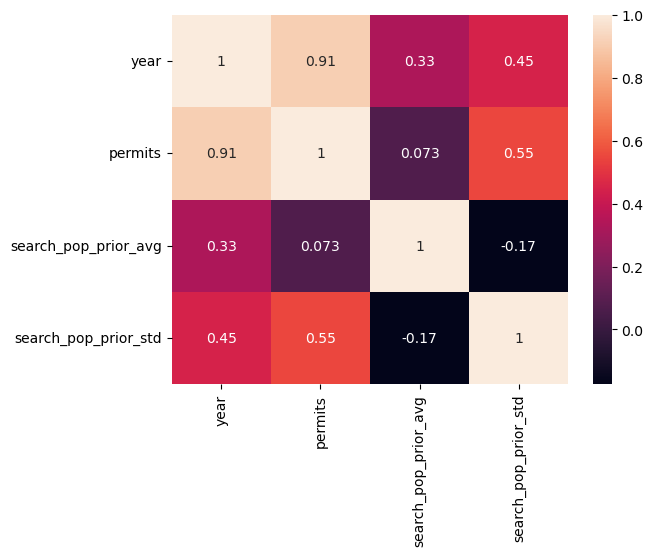

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [60]:
# df.drop('search_pop_prior_avg', axis=1, inplace=True)

In [61]:
df.drop(9, inplace=True)

In [62]:
df

,year,permits,search_pop_prior_avg,search_pop_prior_std
0,2013,1879.0,61.113208,13.473136
1,2014,2655.0,72.576923,12.643445
2,2015,4453.0,37.096154,14.521464
3,2016,5657.0,44.442308,14.993349
4,2017,6069.0,74.903846,13.673016
5,2018,7313.0,65.433962,15.594019
6,2019,7888.0,56.980769,14.276665
7,2021,7200.0,71.442308,15.706141
8,2022,8000.0,62.230769,13.590099


In [63]:
from sklearn.linear_model import LinearRegression

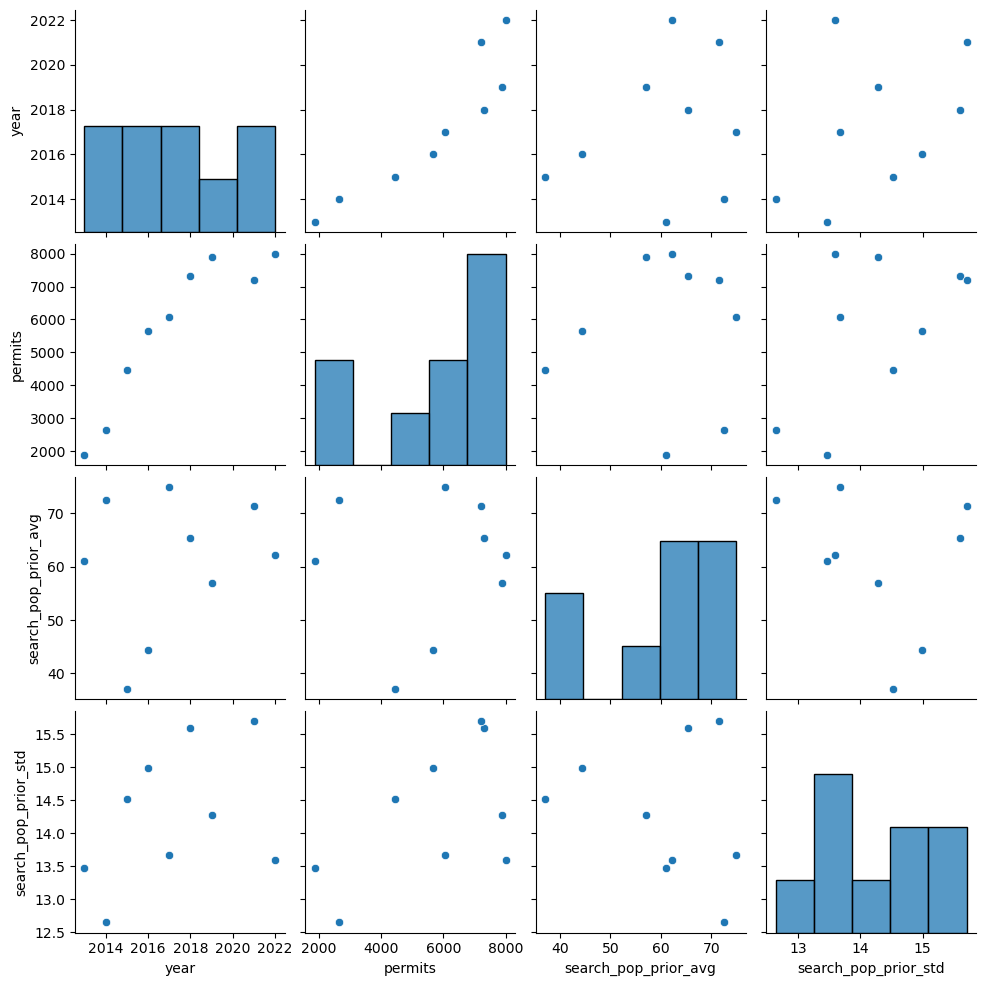

In [64]:
sns.pairplot(df)

In [65]:
X = df[['year', 'search_pop_prior_std', 'search_pop_prior_avg']]
y = df['permits']

reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_

array([632.58056495, 367.54135348, -15.8260538 ])

In [66]:
import statsmodels.api as sm


In [67]:
X = sm.add_constant(X)
X

,const,year,search_pop_prior_std,search_pop_prior_avg
0,1.0,2013,13.473136,61.113208
1,1.0,2014,12.643445,72.576923
2,1.0,2015,14.521464,37.096154
3,1.0,2016,14.993349,44.442308
4,1.0,2017,13.673016,74.903846
5,1.0,2018,15.594019,65.433962
6,1.0,2019,14.276665,56.980769
7,1.0,2021,15.706141,71.442308
8,1.0,2022,13.590099,62.230769


In [68]:
mod = sm.OLS(y, X)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                permits   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     11.62
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0108
Time:                        12:17:41   Log-Likelihood:                -72.366
No. Observations:                   9   AIC:                             152.7
Df Residuals:                       5   BIC:                             153.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.275e+06 

/Users/juanpablozamanillo/opt/anaconda3/envs/pct-data/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [69]:
mod = sm.OLS(y, X[['year', 'const']])
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                permits   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     34.96
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           0.000592
Time:                        12:17:41   Log-Likelihood:                -73.649
No. Observations:                   9   AIC:                             151.3
Df Residuals:                       7   BIC:                             151.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year         668.2015    113.016      5.912      0.0

/Users/juanpablozamanillo/opt/anaconda3/envs/pct-data/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Main Takeaways for a story:

- Test hypotheses that interest you, it doesn't have to end up being correct!
- Sometimes the answer is pretty straightforward, but it's fun to test anyways! Get reps in!
- Not all results have to be significant to be interesting
- Failure to prove a hypothesis can be a great launching point to get more data

---

In [70]:
df = pd.read_csv('data/pct_permits_hiking.csv')
df.head()

,year,permits,search_pop_prior_avg,search_pop_prior_std,hiking_mean,hiking_std
0,2013,1879.0,61.113208,13.473136,45.416667,9.985975
1,2014,2655.0,72.576923,12.643445,55.416667,10.638338
2,2015,4453.0,37.096154,14.521464,64.750000,13.205543
3,2016,5657.0,44.442308,14.993349,66.750000,15.118472
4,2017,6069.0,74.903846,13.673016,65.583333,13.931379


<AxesSubplot: >

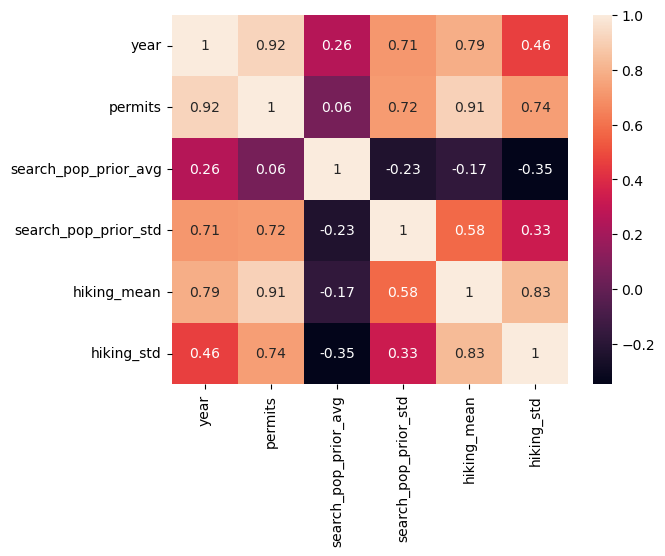

In [71]:
sns.heatmap(df.corr(), annot=True)

In [72]:
df = df[['year', 'hiking_mean', 'permits']]
df

,year,hiking_mean,permits
0,2013,45.416667,1879.0
1,2014,55.416667,2655.0
2,2015,64.750000,4453.0
3,2016,66.750000,5657.0
4,2017,65.583333,6069.0
5,2018,65.333333,7313.0
6,2019,73.750000,7888.0
7,2021,67.500000,7200.0


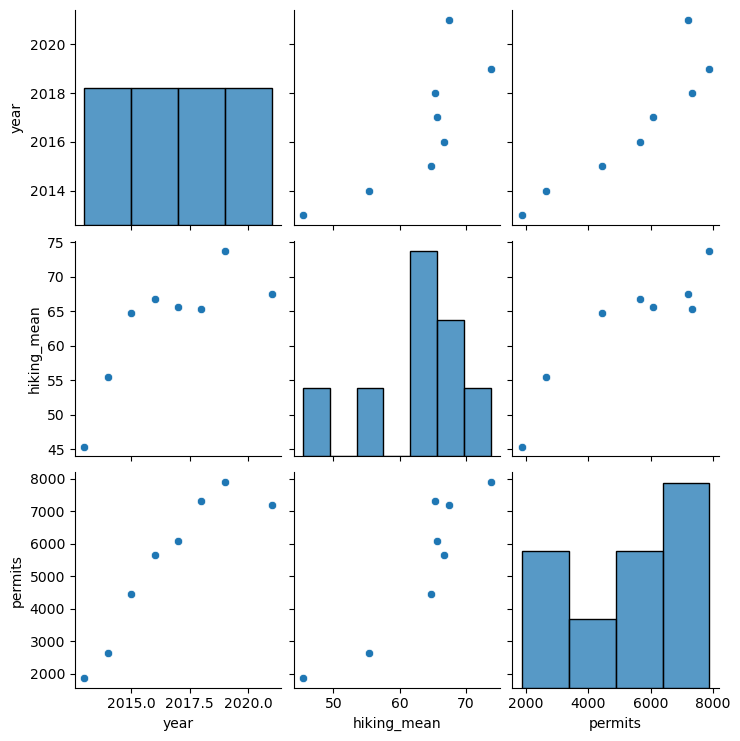

In [73]:
sns.pairplot(df)

In [74]:
X = df.drop('permits', axis=1)
y = df['permits']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                permits   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     35.95
Date:                Thu, 22 Dec 2022   Prob (F-statistic):            0.00108
Time:                        12:17:44   Log-Likelihood:                -61.519
No. Observations:                   8   AIC:                             129.0
Df Residuals:                       5   BIC:                             129.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.898e+05   3.06e+05     -2.906      

/Users/juanpablozamanillo/opt/anaconda3/envs/pct-data/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
